2 Can we use Bagging for regression problems

Yes, Bagging (Bootstrap Aggregating) can be used for regression problems! While it's commonly associated with classification (e.g., Bagging applied to decision trees results in Random Forest Classifier), it also works well for regression tasks.

How Bagging Works for Regression:
Bootstrap Sampling: Multiple subsets of the training data are created using random sampling with replacement.
Base Learners: A regression model (e.g., Decision Trees, Linear Regression, etc.) is trained on each subset.
Aggregation: The final prediction is obtained by averaging the outputs of all base learners.
Why Use Bagging for Regression?
✅ Reduces Variance – Helps prevent overfitting by averaging multiple weak learners.
✅ Handles Complex Data – Works well with high-dimensional and noisy datasets.
✅ Improves Stability – More robust predictions compared to a single model.

Example: Bagging for Regression with Scikit-Learn
python
Copy
Edit
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate data
X, y = make_regression(n_samples=500, n_features=5, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Regressor with Decision Trees
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                     n_estimators=50,
                                     random_state=42)

# Train the model
bagging_regressor.fit(X_train, y_train)

# Predictions
y_pred = bagging_regressor.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
When to Use Bagging for Regression?
When your model has high variance (e.g., deep Decision Trees).
When you have limited data, and averaging multiple models improves robustness.
When you want to boost performance without making strong assumptions about data distribution.
Would you like a comparison with other ensemble methods like Boosting or Stacking? 😊

2 What is the difference between multiple model training and single model training

Difference Between Multiple Model Training and Single Model Training
Feature	Single Model Training	Multiple Model Training
Definition	Training one model on the dataset	Training multiple models on the dataset, either independently or as an ensemble
Complexity	Lower complexity	Higher complexity due to multiple models
Performance	Depends on the model; may overfit or underfit	Often improves accuracy, reduces bias/variance
Training Time	Faster	Slower, as multiple models are trained
Robustness	More prone to errors if the model is weak	More stable and generalizes better
Use Cases	When a single strong model is sufficient	When combining models improves performance (e.g., ensemble learning)


Explain the concept of feature randomness in Random Forest2
Feature Randomness in Random Forest
Feature randomness in Random Forest refers to the way the algorithm selects a random subset of features at each decision split in the individual decision trees. This is a key aspect that helps Random Forest reduce overfitting and improve model diversity.

How Feature Randomness Works:
Random Subset Selection at Each Split

Unlike standard Decision Trees that consider all features to find the best split, Random Forest randomly selects only a subset of features at each node.
The number of features to consider at each split is controlled by the hyperparameter max_features.
Different Trees See Different Feature Combinations

Since each tree in the Random Forest is trained on a different bootstrapped sample with different feature subsets, it introduces randomness.
This randomness ensures that not all trees rely on the same strong predictors, making the ensemble more robust.
Key Benefits of Feature Randomness:
✅ Reduces Overfitting – Since trees don’t rely on the same dominant features, they generalize better.
✅ Increases Diversity – Each tree is different, leading to a stronger ensemble.
✅ Improves Model Stability – Avoids dependency on any single feature, making the model resilient to noise.

Hyperparameter: max_features
Controls the number of features considered for splitting a node.
Common values:
For Regression: max_features = sqrt(n_features) (default)
For Classification: max_features = log2(n_features) (default)
Setting max_features = n_features makes it behave like Bagging.
Example in Scikit-Learn
python
Copy
Edit
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Generate sample data
X, y = make_regression(n_samples=500, n_features=10, noise=0.2, random_state=42)

# Create a Random Forest model with feature randomness
rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42)

# Train the model
rf.fit(X, y)
Would you like a deeper explanation of how max_features affects performance? 😊







Is this conversation helpful so far?










What is OOB (Out-of-Bag) Score
Out-of-Bag (OOB) Score in Random Forest
The Out-of-Bag (OOB) Score is a built-in validation method for Random Forest, which estimates the model’s performance without needing a separate validation set. It is computed using the bootstrap sampling technique.

How OOB Works?
Bootstrap Sampling:

In Random Forest, each decision tree is trained on a random subset of the training data (sampling with replacement).
On average, about 63% of the training samples are included in each tree’s training set.
The remaining 37% of the data are not used for training that specific tree—these are called Out-of-Bag (OOB) samples.
Making Predictions on OOB Samples:

Each tree makes predictions for its own OOB samples (the data it has not seen during training).
The final OOB prediction for each sample is obtained by aggregating (averaging or voting) the predictions from all trees that did not train on it.
Computing the OOB Score:

For regression: OOB Score = R² (coefficient of determination) on OOB predictions.
For classification: OOB Score = Accuracy of OOB predictions.

How can you measure the importance of features in a Random Forest model
easuring Feature Importance in a Random Forest Model
Feature importance in Random Forest helps identify which features contribute the most to predictions. Random Forest provides two main methods to measure feature importance:

1. Mean Decrease in Impurity (MDI) – Gini Importance
Also called "Gini Importance" or "Feature Importance based on Impurity".
Each Decision Tree in the Random Forest uses Gini Impurity (for classification) or Variance Reduction (for regression) to split nodes.
The importance of a feature is measured by how much it reduces impurity across all trees.
Features that appear more frequently in important splits get higher scores.
✅ Pros: Fast and efficient.
❌ Cons: Can be biased toward features with more levels (categorical variables).

Implementation in Scikit-Learn:

python
Copy
Edit
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
X, y = load_iris(return_X_y=True)
feature_names = load_iris().feature_names

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
feature_importances = rf.feature_importances_

# Display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)
2. Permutation Feature Importance
This method randomly shuffles the values of a single feature and observes how the model performance changes.
If shuffling a feature significantly reduces accuracy, it means the feature is important.
Works with any model (not just Random Forest).
✅ Pros: More reliable, avoids bias toward high-cardinality features.
❌ Cons: Computationally expensive since it requires multiple re-evaluations.

Implementation in Scikit-Learn:

python
Copy
Edit
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(rf, X, y, n_repeats=10, random_state=42)

# Display feature importances
importance_df_perm = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})
importance_df_perm = importance_df_perm.sort_values(by='Importance', ascending=False)
print(importance_df_perm)
Comparison: MDI vs. Permutation Importance
Method	Pros	Cons
MDI (Gini Importance)	Fast, built-in	Biased towards categorical features with many values
Permutation Importance	More reliable, works with any model	Slower, requires multiple evaluations
When to Use Each?
If you need a quick feature ranking, use MDI (Gini Importance).
If you need a more robust measure, especially with categorical variables, use Permutation Importance.
Would you l












Search

Reason

C

In [1]:
#2 Explain the working principle of a Bagging Classifier2


SyntaxError: invalid non-printable character U+0006 (<ipython-input-1-3dd913bbfa0d>, line 1)

Working Principle of a Bagging Classifier
A Bagging Classifier (Bootstrap Aggregating) is an ensemble learning method that combines multiple weak learners (e.g., Decision Trees) to improve accuracy and reduce overfitting. It works by training multiple instances of the same base model on different random subsets of data and then aggregating their predictions.

How Does a Bagging Classifier Work?
Bootstrap Sampling (Random Subsets of Data)

The dataset is randomly sampled with replacement to create multiple training sets (each of the same size as the original dataset but with some repeated and missing samples).
Each base model is trained on a different bootstrap sample.
Train Multiple Base Models

A weak learner (typically Decision Trees) is trained on each bootstrap sample.
These models will be slightly different due to variations in their training data.
Aggregate Predictions

For classification: Uses majority voting (the most common class label among all models is chosen).
For regression: Takes the average of all predictions.

In [ ]:
#How do you evaluate a Bagging Classifier’s performance

Evaluating a Bagging Classifier’s Performance
To assess the performance of a Bagging Classifier, we use standard evaluation metrics along with some ensemble-specific techniques. The key steps include:

1. Accuracy Metrics
For classification, common metrics include:
✅ Accuracy – Measures the overall correctness of predictions.
✅ Precision, Recall, F1-Score – Useful for imbalanced datasets.
✅ ROC-AUC Score – Evaluates how well the classifier separates classes.

Example in Scikit-Learn:

python
Copy
Edit
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predictions
y_pred = bagging_clf.predict(X_test)
y_prob = bagging_clf.predict_proba(X_test)[:, 1]  # Probability scores for ROC-AUC

# Evaluate classification performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
2. Cross-Validation
Since Bagging reduces variance, k-fold cross-validation provides a more reliable evaluation by averaging performance across multiple splits.

python
Copy
Edit
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
3. Out-of-Bag (OOB) Score (Specific to Bagging)
Instead of cross-validation, OOB Score can be used as an internal performance estimate. It evaluates the model using out-of-bag samples (data points not seen by individual trees during training).

python
Copy
Edit
# Enable OOB Score in the Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                n_estimators=50, oob_score=True, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Get the OOB Score
print("OOB Score:", bagging_clf.oob_score_)
✅ OOB Score Benefits:

No need for a separate validation set.
Faster than cross-validation.
4. Bias-Variance Analysis
Bagging primarily reduces variance, making predictions more stable.
Compare performance on train vs. test sets:
If training accuracy is much higher than test accuracy → Overfitting.
If both are low → Underfitting (try tuning hyperparameters).
python
Copy
Edit
train_acc = accuracy_score(y_train, bagging_clf.predict(X_train))
test_acc = accuracy_score(y_test, bagging_clf.predict(X_test))

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
5. Feature Importance Analysis (If Base Model is a Decision Tree)
If the base estimator is a Decision Tree, feature importance can be extracted:

python
Copy
Edit
import pandas as pd

# Get feature importance from the first tree in the ensemble
feature_importances = bagging_clf.base_estimator_.feature_importances_
feature_df = pd.DataFrame({'Feature': range(X.shape[1]), 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

print(feature_df)
Summary of Bagging Classifier Evaluation Methods
Method	Use Case
Accuracy, Precision, Recall, F1-Score	General performance measurement
ROC-AUC Score	Binary classification performance (probability-based)
Cross-Validation	Robust model evaluation
Out-of-Bag (OOB) Score	Internal performance estimate without a test set
Bias-Variance Analysis	Checks if the model is overfitting/underfitting
Feature Importance	Identifies key features (if using Decision Trees)

In [ ]:
#2 How does a Bagging Regressor work

How a Bagging Regressor Works
A Bagging Regressor is an ensemble learning method that improves the stability and accuracy of regression models by training multiple base regressors on different random subsets of the dataset and then aggregating their predictions.

Working Principle of Bagging Regressor
Bootstrap Sampling (Random Subsets of Data)

The dataset is randomly sampled with replacement to create multiple training subsets.
Each subset has the same size as the original dataset but contains duplicate and missing samples.
Train Multiple Base Models

A weak learner (e.g., Decision Tree Regressor) is trained on each bootstrap sample.
Each model learns slightly different patterns due to variations in the training data.
Aggregate Predictions

Since this is a regression problem, the final output is the average of all individual model predictions:
𝑦
^
=
1
𝑁
∑
𝑖
=
1
𝑁
𝑦
𝑖
y
^
​
 =
N
1
​
  
i=1
∑
N
​
 y
i
​

This reduces variance and makes predictions more stable.
Advantages of Bagging Regressor
✅ Reduces Overfitting – Averages out fluctuations from individual models.
✅ Improves Accuracy – Aggregating multiple models results in better generalization.
✅ Handles Noisy Data Well – Each model sees different data, reducing bias.
✅ Works with Any Regressor – Though Decision Trees are common, you can use any base regressor.

Example: Implementing Bagging Regressor in Scikit-Learn
python
Copy
Edit
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate sample regression data
X, y = make_regression(n_samples=500, n_features=10, noise=0.2, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Regressor using Decision Trees
bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                               n_estimators=50,
                               random_state=42)

# Train the model
bagging_reg.fit(X_train, y_train)

# Predict on test data
y_pred = bagging_reg.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
Hyperparameters of Bagging Regressor
Hyperparameter	Description
n_estimators	Number of base models (trees)
base_estimator	Type of regressor (e.g., DecisionTreeRegressor)
max_samples	Proportion of data used per model (default = 1.0)
max_features	Number of features considered per model
bootstrap	Whether to sample with replacement (default = True)
oob_score	Whether to use Out-of-Bag (OOB) validation


In [ ]:
#What is the main advantage of ensemble techniques

Main Advantage of Ensemble Techniques
The primary advantage of ensemble techniques is that they combine multiple models to improve performance, making predictions more accurate, robust, and generalizable compared to individual models.

Key Benefits of Ensemble Learning
✅ Higher Accuracy – Reduces errors by leveraging multiple models.
✅ Reduced Overfitting – Models generalize better by averaging out noise.
✅ Lower Variance – Aggregating predictions stabilizes the model.
✅ Works with Weak Models – Even simple models (e.g., Decision Trees) can perform well when combined.
✅ Handles Bias-Variance Tradeoff – Can reduce both bias (Boosting) and variance (Bagging).

In [ ]:
#What is the main challenge of ensemble methods

Main Challenge of Ensemble Methods
While ensemble methods improve accuracy and robustness, they also introduce some challenges. The main challenges include:

1. Increased Complexity
✅ Issue: Combining multiple models makes the overall system harder to interpret and debug.
✅ Example: A single Decision Tree is easy to explain, but a Random Forest with 100 trees is much harder to analyze.
✅ Solution: Use feature importance, SHAP values, or permutation importance for interpretability.

2. Higher Computational Cost
✅ Issue: Training multiple models requires more memory and processing power.
✅ Example: Boosting algorithms like XGBoost train models sequentially, making them computationally expensive.
✅ Solution: Optimize hyperparameters (n_estimators, max_depth), use parallel processing, and leverage GPU acceleration.

3. Risk of Overfitting (Especially in Boosting)
✅ Issue: If ensembles become too complex, they might memorize the training data instead of generalizing well.
✅ Example: Gradient Boosting models can overfit if too many trees are used.
✅ Solution: Use regularization (learning_rate, max_depth), early stopping, and cross-validation.

4. Difficult to Tune Hyperparameters
✅ Issue: Ensembles often have many hyperparameters that need fine-tuning.
✅ Example: XGBoost has parameters like learning_rate, max_depth, subsample, colsample_bytree, etc.
✅ Solution: Use Grid Search, Random Search, or Bayesian Optimization for tuning.

5. Loss of Interpretability
✅ Issue: Individual models in an ensemble are often black boxes.
✅ Example: Decision Trees are interpretable, but a Random Forest with 500 trees is hard to explain.
✅ Solution: Use SHAP values, LIME, or feature importance plots to explain predictions.

In [ ]:
#Explain the key idea behind ensemble techniques2

Why Use Ensemble Methods?
✅ Higher Accuracy – Combines diverse models to reduce individual errors.
✅ Reduced Overfitting – Averaging predictions lowers variance.
✅ Better Generalization – Works well on unseen data.
✅ Handles Bias-Variance Tradeoff – Can reduce both bias (Boosting) and variance (Bagging).

Types of Ensemble Techniques & Their Key Ideas
Ensemble Method	Key Idea	Example Algorithm
Bagging (Bootstrap Aggregating)	Train multiple models on random subsets of data & average results to reduce variance	Random Forest
Boosting	Train models sequentially, where each model corrects the mistakes of the previous one	AdaBoost, XGBoost
Stacking	Train multiple models & combine their outputs using a meta-model	Stacked Generalization
Voting/Blending	Use multiple models & combine their predictions via voting or averaging	Hard/Soft Voting Classifiers
Real-World Example of Ensemble Learning
Imagine you ask 5 doctors for a diagnosis instead of relying on just one. If most of them agree on a condition, you're more confident in the diagnosis. Ensemble techniques work similarly—by combining multiple models, the final decision is more reliable and robust.

In [ ]:
#What is a Random Forest Classifier

What is a Random Forest Classifier?
A Random Forest Classifier is an ensemble learning algorithm that combines multiple Decision Trees to improve classification accuracy and reduce overfitting. It is a type of Bagging (Bootstrap Aggregating) technique that builds multiple decision trees and takes a majority vote for classification.

How Does a Random Forest Classifier Work?
Bootstrap Sampling (Data Randomness)

The training dataset is randomly sampled with replacement to create multiple subsets.
Each subset is used to train an individual Decision Tree.
Feature Randomness (Feature Selection Per Tree)

Instead of considering all features, each tree selects a random subset of features to find the best split.
This makes each tree unique and reduces correlation between them.
Train Multiple Decision Trees

Each tree makes an independent classification decision.
Trees grow deep without pruning, reducing bias.
Majority Voting for Final Prediction

For classification, the final output is determined by majority vote (the most common class among all trees).
For regression, the final prediction is the average of all tree outputs.
Advantages of Random Forest Classifier
✅ Reduces Overfitting – Multiple trees generalize better than a single deep tree.
✅ High Accuracy – Often outperforms individual models.
✅ Handles Missing Data & Noisy Data – Works well even with imperfect datasets.
✅ Works with High-Dimensional Data – Random feature selection helps in complex datasets.
✅ Feature Importance Analysis – Can rank the most important features.

Example: Implementing Random Forest Classifier in Scikit-Learn
python
Copy
Edit
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
Key Hyperparameters in Random Forest
Hyperparameter	Description
n_estimators	Number of trees in the forest
max_depth	Maximum depth of each tree (prevents overfitting)
max_features	Number of features considered per split
min_samples_split	Minimum samples required to split a node
bootstrap	Whether to use bootstrapped samples
When to Use Random Forest?
When you need high accuracy and robust predictions.
When your dataset has many features (high-dimensional data).
When you want to reduce overfitting compared to a single Decision Tree.

In [ ]:
#What are the main types of ensemble techniques

Main Types of Ensemble Techniques
Ensemble techniques can be classified into four main types based on how multiple models are combined to improve predictions.

1. Bagging (Bootstrap Aggregating)
✅ Key Idea: Train multiple independent models on different random subsets of the data and average their predictions to reduce variance.
✅ How It Works:

Randomly sample the dataset with replacement (bootstrap sampling).
Train multiple models (usually weak learners like Decision Trees).
Aggregate results using majority voting (classification) or averaging (regression).
✅ Example Algorithms:
Random Forest (uses multiple Decision Trees).
Bagging Classifier & Bagging Regressor in Scikit-Learn.
✅ Best For: Reducing variance and improving model stability.
2. Boosting
✅ Key Idea: Train models sequentially, where each model corrects the errors of the previous one.
✅ How It Works:

Train a weak model (like a shallow Decision Tree).
Identify misclassified samples and assign them higher weights.
Train a new model focusing more on difficult samples.
Combine predictions (weighted sum or majority vote).
✅ Example Algorithms:
AdaBoost (Adaptive Boosting).
Gradient Boosting Machines (GBM).
XGBoost, LightGBM, CatBoost (Optimized Boosting versions).
✅ Best For: Reducing bias, handling complex relationships, and improving accuracy.
3. Stacking (Stacked Generalization)
✅ Key Idea: Train multiple diverse models and use a meta-model to combine their outputs.
✅ How It Works:

Train different base models (e.g., Decision Tree, SVM, Logistic Regression).
Use their predictions as new features.
Train a meta-model (e.g., Linear Regression or another ML model) to learn the best way to combine predictions.
✅ Example Algorithms:
Stacked Classifier / Stacked Regressor in Scikit-Learn.
Custom stacking using ML models (e.g., blending deep learning & traditional models).
✅ Best For: Combining different model strengths to improve generalization.
4. Voting & Blending
✅ Key Idea: Combine multiple models using a simple aggregation method.
✅ How It Works:

Voting (for classification):
Hard Voting: Selects the class predicted by most models (majority vote).
Soft Voting: Averages probability scores and selects the highest.
Blending: Uses a weighted average of different model predictions.
✅ Example Algorithms:
VotingClassifier (Hard/Soft Voting) in Scikit-Learn.
Blending using weighted averages of models.
✅ Best For: Simple ensemble learning, reducing variance.

In [ ]:
# What is ensemble learning in machine learning

What is Ensemble Learning in Machine Learning?
Ensemble learning is a technique in machine learning where multiple models (often called weak learners or base models) are combined to improve the overall performance, accuracy, and robustness of predictions. Instead of relying on a single model, ensemble methods aggregate multiple models to achieve better generalization and reduce errors.

Why Use Ensemble Learning?
✅ Higher Accuracy – Combines multiple models to reduce individual errors.
✅ Reduces Overfitting – Averaging predictions lowers variance.
✅ Better Generalization – Works well on unseen data.
✅ Handles Bias-Variance Tradeoff – Can reduce both bias (Boosting) and variance (Bagging).

Types of Ensemble Learning Techniques
Bagging (Bootstrap Aggregating)

Trains multiple models in parallel using random subsets of the data.
Reduces variance by averaging predictions (for regression) or majority voting (for classification).
Example: Random Forest.
Boosting

Trains models sequentially, where each model corrects the mistakes of the previous one.
Reduces bias and improves predictive power.
Example: AdaBoost, XGBoost, Gradient Boosting.
Stacking (Stacked Generalization)

Trains multiple models and combines their outputs using a meta-model for better generalization.
Example: A combination of Logistic Regression, Decision Trees, and Neural Networks with a meta-model like Random Forest.
Voting/Blending

Uses multiple models and aggregates their predictions via voting (classification) or averaging (regression).
Example: Hard Voting & Soft Voting Classifiers.
Real-World Examples of Ensemble Learning
Finance: Fraud detection using multiple classifiers.
Healthcare: Disease prediction models with high accuracy.
E-commerce: Recommendation systems using ensemble techniques.
Self-driving Cars: Combining multiple sensors and models for safer decisions.

In [2]:
#2 When should we avoid using ensemble methods

When Should We Avoid Using Ensemble Methods?
While ensemble methods improve accuracy and robustness, they are not always the best choice. Here are situations where they might not be ideal:

1. When Interpretability is Crucial
✅ Issue: Ensemble models (e.g., Random Forest, XGBoost) are often black boxes.
✅ Example: In medical diagnosis, finance, or legal applications, a simple model like Logistic Regression is preferred because decisions need to be explainable.
✅ Alternative: Use simpler models like Decision Trees or SHAP values for explaining complex ensembles.

2. When Computational Resources are Limited
✅ Issue: Ensemble models require high computational power due to multiple models being trained.
✅ Example:

Boosting models (XGBoost, LightGBM) require large memory and processing time.
Neural network ensembles are slow for real-time applications.
✅ Alternative: Use a single well-tuned model (e.g., Support Vector Machines, Decision Trees) for faster predictions.
3. When the Dataset is Small
✅ Issue: Ensembles rely on training multiple models, which may lead to overfitting on small datasets.
✅ Example: A dataset with only a few hundred samples may not benefit from ensemble learning.
✅ Alternative: Use a single strong model (e.g., SVM, Ridge Regression) and apply cross-validation to improve performance.

In [ ]:
#How does Bagging help in reducing overfitting

How Does Bagging Reduce Overfitting?
Bagging (Bootstrap Aggregating) is an ensemble technique that helps reduce overfitting by training multiple models on different random subsets of the data and averaging their predictions. It is particularly useful for high-variance models like Decision Trees.

Key Ways Bagging Reduces Overfitting
1. Reduces Variance Through Averaging
✅ Issue: A single model (e.g., a deep Decision Tree) tends to overfit by memorizing noise in the data.
✅ Solution: Bagging trains multiple models on different subsets and takes an average (for regression) or majority vote (for classification), smoothing out individual model errors.
✅ Example:

If one Decision Tree overfits by capturing noise, other trees trained on different data will reduce this effect.
The final prediction is more stable and less sensitive to individual tree errors.
2. Uses Bootstrapped Sampling (Data Randomness)
✅ Issue: A single model trained on one dataset might capture patterns too specifically.
✅ Solution: Bagging randomly samples data with replacement, ensuring that each model sees slightly different variations of the data.
✅ Effect: This diversity in training helps models learn general patterns instead of overfitting to specific noise.

3. Reduces Over-Reliance on Specific Features (Feature Randomness in Random Forests)
✅ Issue: Overfitting occurs when a model relies too much on a specific feature set.
✅ Solution: In Random Forest, each tree considers only a random subset of features, ensuring different decision-making paths.
✅ Effect: This prevents models from always picking the most dominant features, leading to better generalization.

4. Creates Independent Models That Are Less Correlated
✅ Issue: A single complex model may memorize the dataset instead of learning general patterns.
✅ Solution: By training multiple independent models and averaging their outputs, Bagging ensures that the final prediction is less influenced by outliers or noise in any single model.

In [3]:
#PRACTICAL QUESTIONS ///////////////////

In [4]:
#Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy2
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier using Decision Trees
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),  # Decision Tree as base model
    n_estimators=100,  # Number of trees in the ensemble
    random_state=42
)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [5]:
#Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)2
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load California Housing dataset (alternative to Boston dataset)
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Regressor using Decision Trees
bagging_reg = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),  # Decision Tree as base model
    n_estimators=100,  # Number of trees in the ensemble
    random_state=42
)

# Train the Bagging Regressor
bagging_reg.fit(X_train, y_train)

# Make predictions
y_pred = bagging_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'base_estimator'

In [6]:
#2 Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores2
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Get feature importance scores
feature_importance = rf_clf.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("\nFeature Importance Scores:")
print(importance_df)


Model Accuracy: 0.96

Feature Importance Scores:
                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    

In [7]:
#Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_regressor.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) for both models
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Print the results
print(f"Decision Tree Regressor MSE: {mse_dt:.4f}")
print(f"Random Forest Regressor MSE: {mse_rf:.4f}")


Decision Tree Regressor MSE: 0.4952
Random Forest Regressor MSE: 0.2554


In [8]:
#	2 Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train a Random Forest Classifier with OOB score enabled
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_clf.fit(X, y)  # No train-test split needed for OOB score

# Print the Out-of-Bag (OOB) Score
print(f"OOB Score: {rf_clf.oob_score_:.4f}")


OOB Score: 0.9613


In [9]:
#Train a Bagging Classifier using SVM as a base estimator and print accuracy2
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier using SVM as the base estimator
bagging_svm = BaggingClassifier(
    base_estimator=SVC(),  # SVM as base model
    n_estimators=10,  # Number of SVM models in the ensemble
    random_state=42
)

# Train the Bagging Classifier
bagging_svm.fit(X_train, y_train)

# Make predictions
y_pred = bagging_svm.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [10]:
#Train a Random Forest Classifier with different numbers of trees and compare accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different values for number of trees in the Random Forest
n_estimators_list = [10, 50, 100, 200, 500]

# Store accuracy results
accuracy_results = {}

# Train and evaluate the model for different numbers of trees
for n in n_estimators_list:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_clf.fit(X_train, y_train)  # Train the model
    y_pred = rf_clf.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    accuracy_results[n] = accuracy
    print(f"n_estimators = {n}, Accuracy: {accuracy:.4f}")

# Print final comparison
print("\nFinal Accuracy Comparison:")
for n, acc in accuracy_results.items():
    print(f"Random Forest with {n} trees -> Accuracy: {acc:.4f}")


n_estimators = 10, Accuracy: 0.9561
n_estimators = 50, Accuracy: 0.9649
n_estimators = 100, Accuracy: 0.9649
n_estimators = 200, Accuracy: 0.9649
n_estimators = 500, Accuracy: 0.9649

Final Accuracy Comparison:
Random Forest with 10 trees -> Accuracy: 0.9561
Random Forest with 50 trees -> Accuracy: 0.9649
Random Forest with 100 trees -> Accuracy: 0.9649
Random Forest with 200 trees -> Accuracy: 0.9649
Random Forest with 500 trees -> Accuracy: 0.9649


In [11]:
#Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier using Logistic Regression as the base estimator
bagging_lr = BaggingClassifier(
    base_estimator=LogisticRegression(max_iter=5000),  # Logistic Regression as base model
    n_estimators=50,  # Number of base models in ensemble
    random_state=42
)

# Train the Bagging Classifier
bagging_lr.fit(X_train, y_train)

# Predict probabilities for AUC computation
y_prob = bagging_lr.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute and print AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"Model AUC Score: {auc_score:.4f}")


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [12]:
#Train a Random Forest Regressor and analyze feature importance scores
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_regressor.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("\nFeature Importance Scores:")
print(importance_df)



Feature Importance Scores:
      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


In [13]:
#2 Train an ensemble model using both Bagging and Random Forest and compare accuracy.
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Classifier using Decision Trees as base estimator
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy scores
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [14]:
#Train a Random Forest Classifier and tune hyperparameters using GridSearchCV=
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a base RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20],             # Tree depth
    'min_samples_split': [2, 5, 10],         # Min samples to split a node
    'min_samples_leaf': [1, 2, 4]            # Min samples per leaf node
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best pa


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [15]:
#Train a Bagging Regressor with different numbers of base estimators and compare performance=
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different values for the number of base estimators (Decision Trees)
n_estimators_list = [5, 10, 50, 100, 200]

# Store MSE results
mse_results = {}

# Train and evaluate the model for different numbers of estimators
for n in n_estimators_list:
    bagging_reg = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=42,
        n_jobs=-1
    )
    bagging_reg.fit(X_train, y_train)  # Train the model
    y_pred = bagging_reg.predict(X_test)  # Make predictions
    mse = mean_squared_error(y_test, y_pred)  # Compute MSE
    mse_results[n] = mse
    pri


TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
#Train a Random Forest Classifier and analyze misclassified samples
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred = rf_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Identify misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_samples = X_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

# Create a DataFrame for analysis
misclassified_df = pd.DataFrame(misclassified_samples, columns=feature_names)
misclassified_df['True Label'] = true_labels
misclassified_df['Predicted Label'] = predicted_labels

# Display misclassified samples
print("\nMisclassified Samples:")
print(misclassified_df)


In [ ]:
#Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Single Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Train a Bagging Classifier with Decision Trees as base estimators
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,  # Number of trees in Bagging
    random_state=42,
    n_jobs=-1
)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Print comparison results
print(f"Single Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")

# Display the improvement in accuracy
improvement = (accuracy_bagging - accuracy_dt) * 100
print(f"Performance Improvement: {improvement:.2f}%")


In [ ]:
#= Train a Random Forest Classifier and visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred = rf_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


In [ ]:
#Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)

# Train individual models
dt_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

# Predict using individual models
y_pred_dt = dt_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)
y_pred_lr = lr_clf.predict(X_test)

# Compute accuracy for individual models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Define the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('Decision Tree', dt_clf),
        ('SVM', svm_clf),
        ('Logistic Regression', lr_clf)
    ],
    final_estimator=LogisticRegression(),
    n_jobs=-1
)

# Train Stacking Classifier
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)

# Compute accuracy for Stacking Classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Print comparison results
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Stacking Classifier Accuracy: {accuracy_stacking:.4f}")


Top 5 Most Important Features:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


<ipython-input-16-fe91fadd0624>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_df['Importance'][:5], y=feature_df['Feature'][:5], palette='viridis')


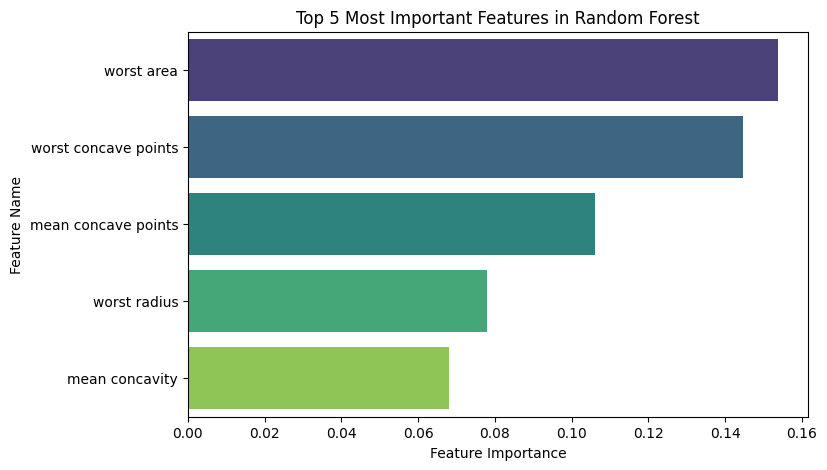

In [16]:
#Train a Random Forest Classifier and print the top 5 most important features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_clf.feature_importances_

# Create a DataFrame for feature importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print the top 5 most important features
print("Top 5 Most Important Features:")
print(feature_df.head(5))

# Plot the top 5 features
plt.figure(figsize=(8,5))
sns.barplot(x=feature_df['Importance'][:5], y=feature_df['Feature'][:5], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 5 Most Important Features in Random Forest')
plt.show()


In [17]:
#Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Classifier with Decision Trees as base estimators
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,  # Number of trees in Bagging
    random_state=42,
    n_jobs=-1
)
bagging_clf.fit(X_train, y_train)

# Predict on test set
y_pred = bagging_clf.predict(X_test)

# Compute Precision, Recall, and F1-score
report = classification_report(y_test, y_pred, target_names=data.target_names)

# Print classification report
print("Performance Evaluation of Bagging Classifier:\n")
print(report)



TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

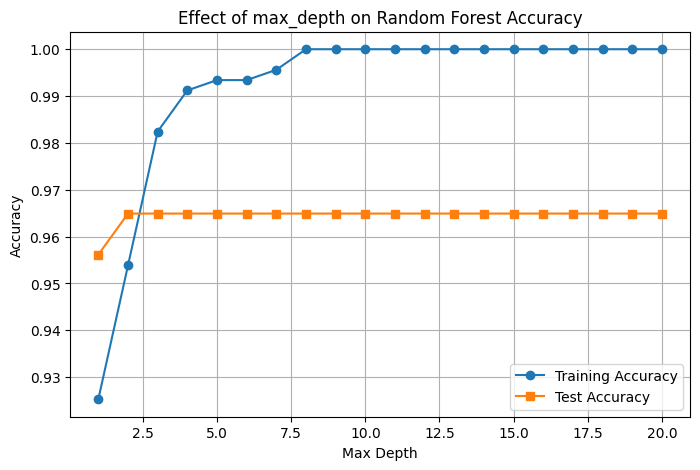

In [18]:
#Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of max_depth values to test
max_depth_values = range(1, 21)
train_accuracies = []
test_accuracies = []

# Train models with different max_depth values
for depth in max_depth_values:
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_clf.fit(X_train, y_train)

    # Compute accuracy on training and test sets
    train_acc = accuracy_score(y_train, rf_clf.predict(X_train))
    test_acc = accuracy_score(y_test, rf_clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot accuracy vs. max_depth
plt.figure(figsize=(8,5))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Random Forest Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
#Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
#performance=
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
dt_regressor = DecisionTreeRegressor(random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train Bagging Regressor with Decision Tree
bagging_dt = BaggingRegressor(base_estimator=dt_regressor, n_estimators=50, random_state=42, n_jobs=-1)
bagging_dt.fit(X_train, y_train)

# Train Bagging Regressor with KNN
bagging_knn = BaggingRegressor(base_estimator=knn_regressor, n_estimators=50, random_state=42, n_jobs=-1)
bagging_knn.fit(X_train, y_train)

# Predict on test set
y_pred_dt = bagging_dt.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)

# Compute evaluation metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print performance comparison
print(f"Bagging Regressor (Decision Tree) - MSE: {mse_dt:.4f}, R² Score: {r2_dt:.4f}")
print(f"Bagging Regressor (KNN) - MSE: {mse_knn:.4f}, R² Score: {r2_knn:.4f}")

# Plot performance comparison
models = ['Bagging (Decision Tree)', 'Bagging (KNN)']
mse_scores = [mse_dt, mse_knn]
r2_scores = [r2_dt, r2_knn]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(models, mse_scores, color=['blue', 'green'])
ax[0].set_title('MSE Comparison')
ax[0].set_ylabel('Mean Squared Error')

ax[1].bar(models, r2_scores, color=['blue', 'green'])
ax[1].set_title('R² Score Comparison')
ax[1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()


TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'base_estimator'

ROC-AUC Score: 0.9953


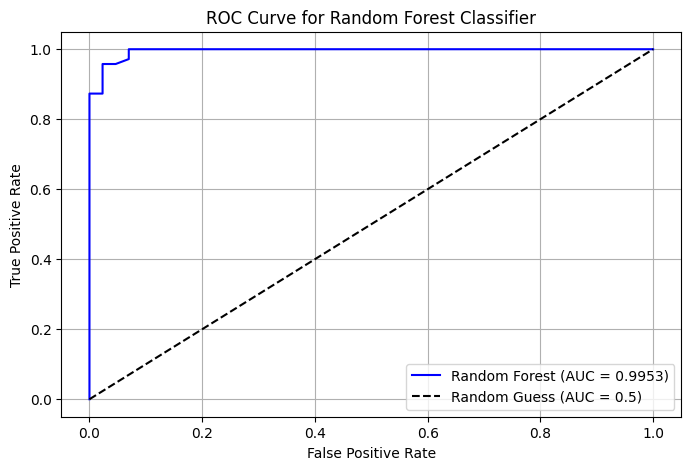

In [20]:
#Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict probabilities for positive class
y_prob = rf_clf.predict_proba(X_test)[:, 1]

# Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
#Train a Bagging Classifier and evaluate its performance using cross-validatio.
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Define a Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                n_estimators=50, random_state=42, n_jobs=-1)

# Perform cross-validation (5 folds)
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')

# Print accuracy scores for each fold
print(f"Cross-Validation Scores: {cv_scores}")

# Compute and print mean accuracy
mean_accuracy = np.mean(cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.4f}")


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

Precision-Recall AUC: 0.9971


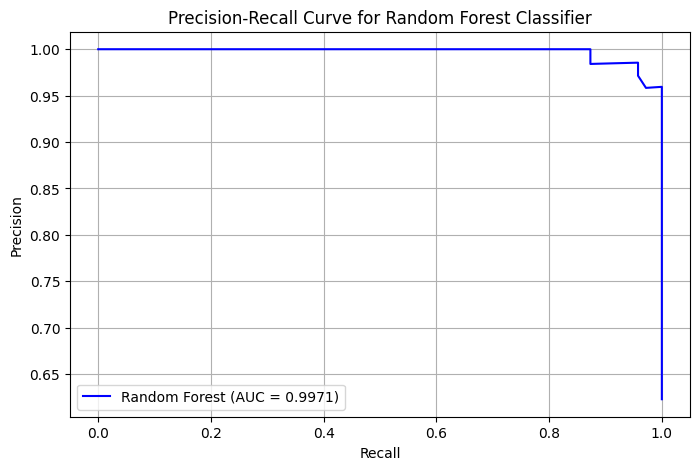

In [22]:
#Train a Random Forest Classifier and plot the Precision-Recall curv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = rf_clf.predict_proba(X_test)[:, 1]

# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute AUC-PR score
auc_pr = auc(recall, precision)
print(f"Precision-Recall AUC: {auc_pr:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8,5))
plt.plot(recall, precision, label=f'Random Forest (AUC = {auc_pr:.4f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest Classifier")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
#= Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy=
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Define Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# Train individual classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)

rf_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_clf.predict(X_test)
y_pred_lr = lr_clf.predict(X_test)
y_pred_stacking = stacking_clf.predict(X_test)

# Compute accuracy scores
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Print results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Stacking Classifier Accuracy: {accuracy_stacking:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Random Forest Accuracy: 0.9649
Logistic Regression Accuracy: 0.9561
Stacking Classifier Accuracy: 0.9649


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
